In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2022-09-18 06:08:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data.1’

spambase.data.1     100%[===================>] 686.47K  --.-KB/s    in 0.1s    

2022-09-18 06:08:49 (4.80 MB/s) - ‘spambase.data.1’ saved [702942/702942]



In [3]:
def load_spam_dataset(spamBase_data):
  spamBase_data = pd.read_csv(spamBase_data, header=None)
  label = spamBase_data[57]
  # print(label)
  spamBase_data.drop(spamBase_data.columns[[57]], axis=1, inplace=True)
  features = spamBase_data
  # print(features)
  x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

  spamBase_data_mean = x_train.mean(axis=0)
  spamBase_data_std = x_train.std(axis=0)

  x_train = x_train - spamBase_data_mean
  x_train = x_train / spamBase_data_std
  x_test = x_test - spamBase_data_mean
  x_test = x_test / spamBase_data_std

  # print(x_train.shape)
  # print(x_test.shape)
  data = x_train, y_train, x_test, y_test
  return data


data_loader = load_spam_dataset('/content/spambase.data')


In [18]:
baseModel = tf.keras.Sequential(name="spamBase_model")

baseModel.add(Dense(input_shape=(data_loader[0].shape[1],), units = 64,activation='tanh', name='dense_layer1'))
baseModel.add(Dense(32,activation='tanh',name='dense_layer2'))
baseModel.add(Dense(8,activation='tanh',name='dense_layer3'))
baseModel.add(Flatten())
baseModel.add(Dense(1,activation='sigmoid',name='dense_layer4'))


baseModel.summary()

Model: "spamBase_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 64)                3712      
                                                                 
 dense_layer2 (Dense)        (None, 32)                2080      
                                                                 
 dense_layer3 (Dense)        (None, 8)                 264       
                                                                 
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_layer4 (Dense)        (None, 1)                 9         
                                                                 
Total params: 6,065
Trainable params: 6,065
Non-trainable params: 0
_________________________________________________________________


In [19]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/spamBase-loss_{loss:.3f}_val_acc{val_accuracy:.3f}.h5',
        monitor = 'val_accuracy',
        save_best_only = True
        ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor = 'loss',
        factor = 0.1,
        patience = 10,
        min_lr = 1e-5
    ),
]

rms = tf.keras.optimizers.RMSprop(1e-5)


baseModel.compile(
    loss="binary_crossentropy",
    optimizer=rms,
	  metrics=['accuracy']
)

history0 = baseModel.fit(
    data_loader[0], data_loader[1],
    epochs = 100,
    validation_data=(data_loader[2], data_loader[3]),
    callbacks=my_callbacks)

Epoch 1/100
115/115 [==============================] - 1s 5ms/step - loss: 0.6276 - accuracy: 0.6609 - val_loss: 0.6235 - val_accuracy: 0.6569 - lr: 1.0000e-05
Epoch 2/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6070 - accuracy: 0.6864 - val_loss: 0.6039 - val_accuracy: 0.6895 - lr: 1.0000e-05
Epoch 3/100
115/115 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.7147 - val_loss: 0.5852 - val_accuracy: 0.7188 - lr: 1.0000e-05
Epoch 4/100
115/115 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7424 - val_loss: 0.5674 - val_accuracy: 0.7405 - lr: 1.0000e-05
Epoch 5/100
115/115 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.7707 - val_loss: 0.5505 - val_accuracy: 0.7666 - lr: 1.0000e-05
Epoch 6/100
115/115 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.7897 - val_loss: 0.5345 - val_accuracy: 0.7915 - lr: 1.0000e-05
Epoch 7/100
115/115 [===================

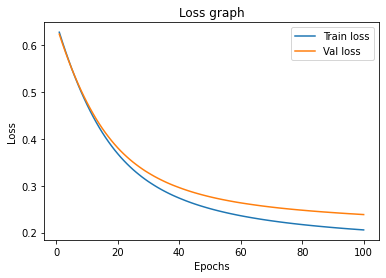

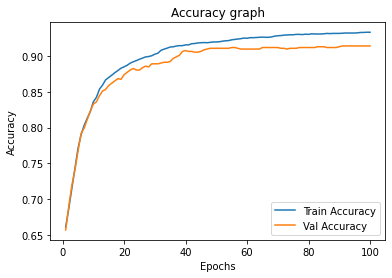

In [20]:
load_fit0 = history0.history
loss = load_fit0['loss']
val_loss = load_fit0['val_loss']
accuracy = load_fit0['accuracy']
val_accuracy = load_fit0['val_accuracy']
epochs = range(1,len(loss)+1)


plt.plot(epochs,loss, label='Train loss')
plt.plot(epochs,val_loss,label='Val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss graph")
plt.show()

print("\n")

plt.clf()
plt.plot(epochs,accuracy, label='Train Accuracy')
plt.plot(epochs,val_accuracy,label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy graph")
plt.show()

In [4]:
model = tf.keras.Sequential(name="spamBase_model_updated")

model.add(Dense(input_dim=57, units=32,activation='tanh', name='dense_layer1'))
model.add(Dense(units=16,activation='tanh',name='dense_layer2'))
model.add(Dense(units=8,activation='tanh',name='dense_layer3'))
model.add(Dense(units=4,activation='tanh',name='dense_layer4'))
model.add(Dense(units=2,activation='tanh',name='dense_layer5'))
model.add(Dense(units=1,activation='sigmoid',name='dense_layer6'))


model.summary()

Model: "spamBase_model_updated"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 32)                1856      
                                                                 
 dense_layer2 (Dense)        (None, 16)                528       
                                                                 
 dense_layer3 (Dense)        (None, 8)                 136       
                                                                 
 dense_layer4 (Dense)        (None, 4)                 36        
                                                                 
 dense_layer5 (Dense)        (None, 2)                 10        
                                                                 
 dense_layer6 (Dense)        (None, 1)                 3         
                                                                 
Total params: 2,569
Trainable params: 2,569


In [5]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/spamBase-loss_{loss:.3f}_val_acc{val_accuracy:.3f}.h5',
        monitor = 'val_accuracy',
        save_best_only = True
        ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor = 'loss',
        factor = 0.1,
        patience = 10,
        min_lr = 1e-5
    ),
]

adam = tf.keras.optimizers.Adam(1e-3)


model.compile(
    loss="binary_crossentropy",
    optimizer=adam,
	  metrics=['accuracy']
)

history1 = model.fit(
    data_loader[0], data_loader[1],
    epochs = 100,
    validation_data=(data_loader[2], data_loader[3]),
    callbacks=my_callbacks)

Epoch 1/100
115/115 [==============================] - 2s 5ms/step - loss: 0.4632 - accuracy: 0.8579 - val_loss: 0.3663 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 0s 4ms/step - loss: 0.3192 - accuracy: 0.9285 - val_loss: 0.2986 - val_accuracy: 0.9251 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.9361 - val_loss: 0.2704 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 0s 4ms/step - loss: 0.2431 - accuracy: 0.9389 - val_loss: 0.2471 - val_accuracy: 0.9349 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9438 - val_loss: 0.2453 - val_accuracy: 0.9305 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9435 - val_loss: 0.2339 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 0s 3ms/st

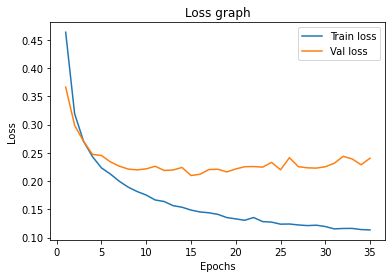

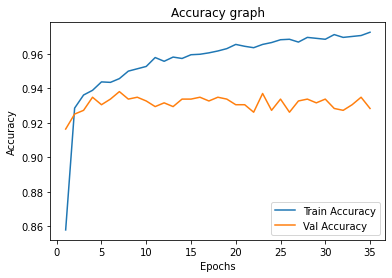

In [6]:
load_fit0 = history1.history
loss = load_fit0['loss']
val_loss = load_fit0['val_loss']
accuracy = load_fit0['accuracy']
val_accuracy = load_fit0['val_accuracy']
epochs = range(1,len(loss)+1)


plt.plot(epochs,loss, label='Train loss')
plt.plot(epochs,val_loss,label='Val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss graph")
plt.show()

print("\n")

plt.clf()
plt.plot(epochs,accuracy, label='Train Accuracy')
plt.plot(epochs,val_accuracy,label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy graph")
plt.show()

In [15]:
from keras.models import load_model
model = load_model('./spamBase-loss_0.068_val_acc0.948.h5')
pred = model.predict(data_loader[2])
print("Prediction vector: ",pred)

Predictions vector :  [[9.98313546e-01]
 [3.62402052e-02]
 [9.94995475e-01]
 [5.88683120e-04]
 [1.40377199e-02]
 [9.97207344e-01]
 [9.98331845e-01]
 [1.77309185e-03]
 [2.23914087e-02]
 [9.73257780e-01]
 [9.95160758e-01]
 [5.13670826e-03]
 [6.12863223e-04]
 [5.55807783e-04]
 [5.07988967e-04]
 [4.60777810e-04]
 [9.96433377e-01]
 [6.35341043e-04]
 [3.51296663e-02]
 [5.83265151e-04]
 [9.95642304e-01]
 [9.97836411e-01]
 [7.02760182e-04]
 [1.17579298e-02]
 [1.76059536e-03]
 [9.98468935e-01]
 [9.98436153e-01]
 [4.11662683e-02]
 [9.92735386e-01]
 [5.27003780e-04]
 [4.67644818e-03]
 [5.21373227e-02]
 [2.48279154e-01]
 [9.77183104e-01]
 [9.98125732e-01]
 [2.57275980e-02]
 [9.97760057e-01]
 [9.97320831e-01]
 [4.46140330e-04]
 [5.91067187e-02]
 [5.18881076e-04]
 [5.91962191e-04]
 [5.79958782e-04]
 [9.64508474e-01]
 [5.06262062e-04]
 [9.97047246e-01]
 [9.96903121e-01]
 [1.19750926e-04]
 [5.98069979e-04]
 [1.25142408e-03]
 [9.95804250e-01]
 [6.12865551e-04]
 [7.81521725e-04]
 [1.28432282e-03]
 [1.16

In [7]:
# reference for this cell is (https://github.com/ikhlo/Spambase-Prediction/blob/main/Spambase_project.ipynb)

import re
from collections import Counter

def text_to_ind(text):
    all_variables = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
    dic = {}
    text_split = re.split(r'\W+', text)
    text_split_count = Counter(text_split)
    for i in range(48):
        if all_variables[i] in text_split_count.keys() : dic[all_variables[i]] = 100*text_split_count[all_variables[i]]/len(text_split)
        else : dic[all_variables[i]] = float(0)
            
    for i in range(48,54):
        dic[all_variables[i]] = 100*text.count(all_variables[i])/(len(text)- text.count(' '))
    
    all_uppercase_sequence = re.findall(r"[A-Z]+", text)
    sum_uppercase = 0
    
    for sequence in all_uppercase_sequence:
        sum_uppercase += len(sequence)
    
    dic['capital_run_length_average'] = sum_uppercase/len(all_uppercase_sequence)
    dic['capital_run_length_longest'] = len(max(all_uppercase_sequence, key=len))
    dic['capital_run_length_total'] = sum_uppercase
    
    return np.array(list(dic.values())).reshape(1,-1)
    

In [13]:
text = 'You won 100,000 USD! You can pay all your debts now.'
load_model('./spamBase-loss_0.068_val_acc0.948.h5').predict(text_to_ind(text))[0]


array([0.996849], dtype=float32)